# Data Description
Versions:
- raw (under `./data/raw`): Original data extracted from html
- preprocessed (under `./data/preprocessed`): Preprocessed data that mainly aim to remove missing values and/or parsing some strings.
- finalized (under `./data/finalized`): Actual data we are going to use, features are shown below

Features:
- Instructor: Name of the instructor
- Course: Name of the course,
- Term: In which term the course is held
- Enroll: Number of students enrolled
- Evals Made: Number of evaluations made (does not affect Avg Grade Expected)
- Rcmnd Class: Proportion of students who recommend class
- Rcmnd Instr: Proportion of students who recommend instructor
- Study Hrs/wk: Study hours per week
- Avg Grade Expected: Expected average grade (among evaluations made)
- Avg Grade Received: Actual average grade (among all students)
- isPreGPT: GPT hasn't been introduced when the course in live
- isSTEM: The course is a STEM course
- isAbstract: The course is either proof based or focusing on abstract concepts that GPT is not good at (valid if `isSTEM=True`)
- isWritten: The course is mainly based on written materials instead of audio/video (valid if `isSTEM=False`)
- isUD: The course is upper division course

In [1]:
# import statements...
import pandas as pd
import numpy as np
from scripts.data_analysis import *

import os
import glob

import gc

np.random.seed(189)

In [2]:
# read in data
path = './data/finalized'
csv_files = []

for file in glob.glob(os.path.join(path, '*')):
    if os.path.isfile(file):
        csv_files.append(file)

df = [pd.read_csv(file) for file in csv_files]
df = pd.concat(df)
df = df.reset_index(drop=True)

gc.collect()

df.head()

,Instructor,Course,Term,Enroll,Evals Made,Rcmnd Class,Rcmnd Instr,Study Hrs/wk,Avg Grade Expected,Avg Grade Received,isPreGPT,isSTEM,isAbstract,isWritten,isUD
0,"Johnson, Sara E.",LTAM 111,SP23,46,38,1.000,1.000,4.99,3.76,3.84,False,False,False,True,True
1,"Fiss, Geraldine Anna",LTEA 110C,SP23,53,39,1.000,1.000,6.09,3.71,3.75,False,False,False,True,True
2,"Liao, Ping H",LTEA 120B,SP23,225,70,0.627,0.591,5.25,3.73,3.56,False,False,False,True,True
3,"Mendoza, Andrea",LTEA 132,SP23,58,9,1.000,1.000,5.00,3.88,3.65,False,False,False,True,True
4,"Lee, Jin-Kyung",LTEA 143,SP23,61,21,0.905,0.900,3.17,3.85,3.42,False,False,False,True,True


# Exploratory Data Analysis (EDA)
- **Descriptive Statistics**
  - Summary statistics for key features.
- **Visualizations**
  - Histograms, box plots, and other relevant visualizations to understand the distribution of grades and other features

# Analysis

Dividing data into several sub-groups

All of them should undergoes pretty similar structure:
1. Compare distributions (i.e. histogram, boxplot, etc.)
2. Statistical tests
3. Interpretation

## STEM Lower Division Courses

### STEM_lowerDivision_preGPT vs. STEM_lowerDivision_postGPT**

In [3]:
# filter out data
params = {
    'is_ud': False,
    'is_stem': True,
    'is_abstract': False,
    'is_written': False # no effect
}

pre_gpt, post_gpt = filter_data(df, **params)

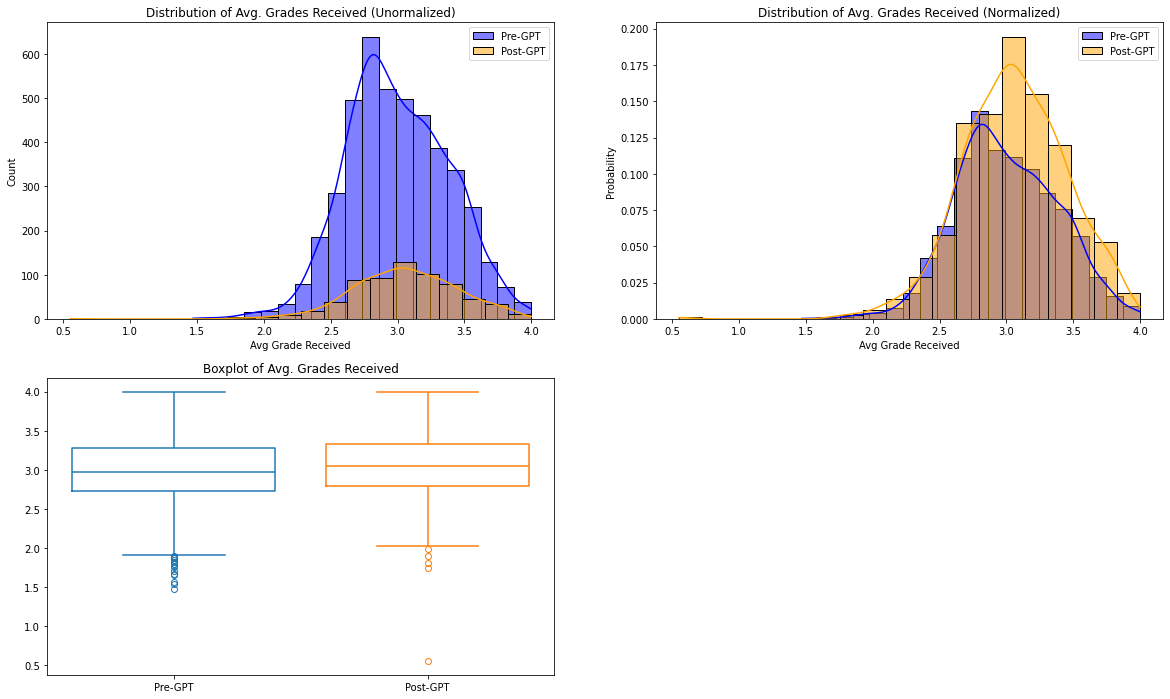

In [4]:
# visualization
plot_dist(pre_gpt, post_gpt)

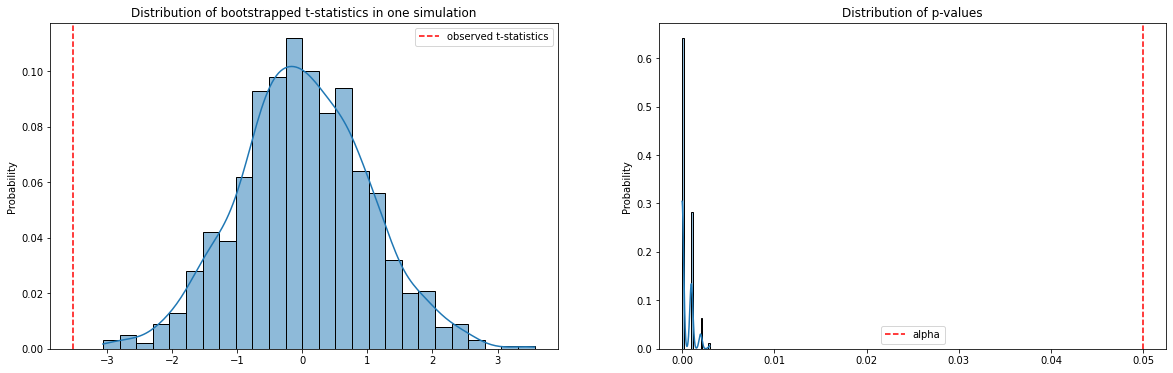

In [5]:
# bootstrapping t-test
observed_t, bootstrap_t, p_vals = bootstrap_ttest(pre_gpt['Avg Grade Received'], post_gpt['Avg Grade Received'])

plot_bootstrap_test(observed_t, bootstrap_t, p_vals)

## Arts Lower Division Courses

### Arts_lowerDivision_writtenBased_preGPT vs. Arts_lowerDivision_writtenBased_postGPT

In [6]:
# filter out data
params = {
    'is_ud': False,
    'is_stem': False,
    'is_abstract': False, # no effect
    'is_written': True
}

pre_gpt, post_gpt = filter_data(df, **params)

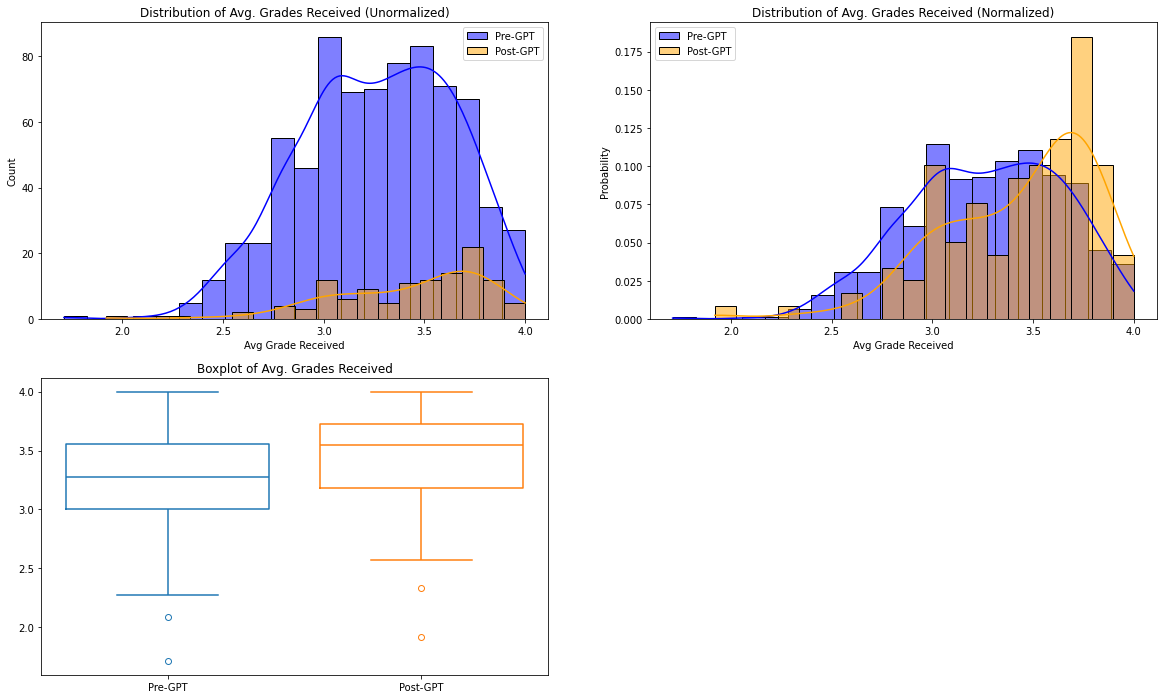

In [7]:
# visualization
plot_dist(pre_gpt, post_gpt)

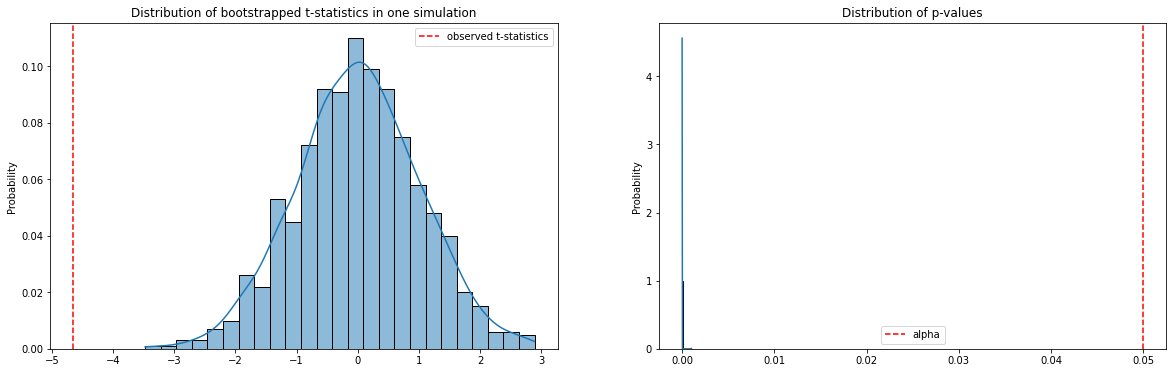

In [8]:
# bootstrapping t-test
observed_t, bootstrap_t, p_vals = bootstrap_ttest(pre_gpt['Avg Grade Received'], post_gpt['Avg Grade Received'])

plot_bootstrap_test(observed_t, bootstrap_t, p_vals)

### Arts_lowerDivision_notWrittenBased_preGPT vs. Arts_lowerDivision_notWrittenBased_postGPT

In [9]:
# filter out data
params = {
    'is_ud': False,
    'is_stem': False,
    'is_abstract': False, # no effect
    'is_written': False
}

pre_gpt, post_gpt = filter_data(df, **params)

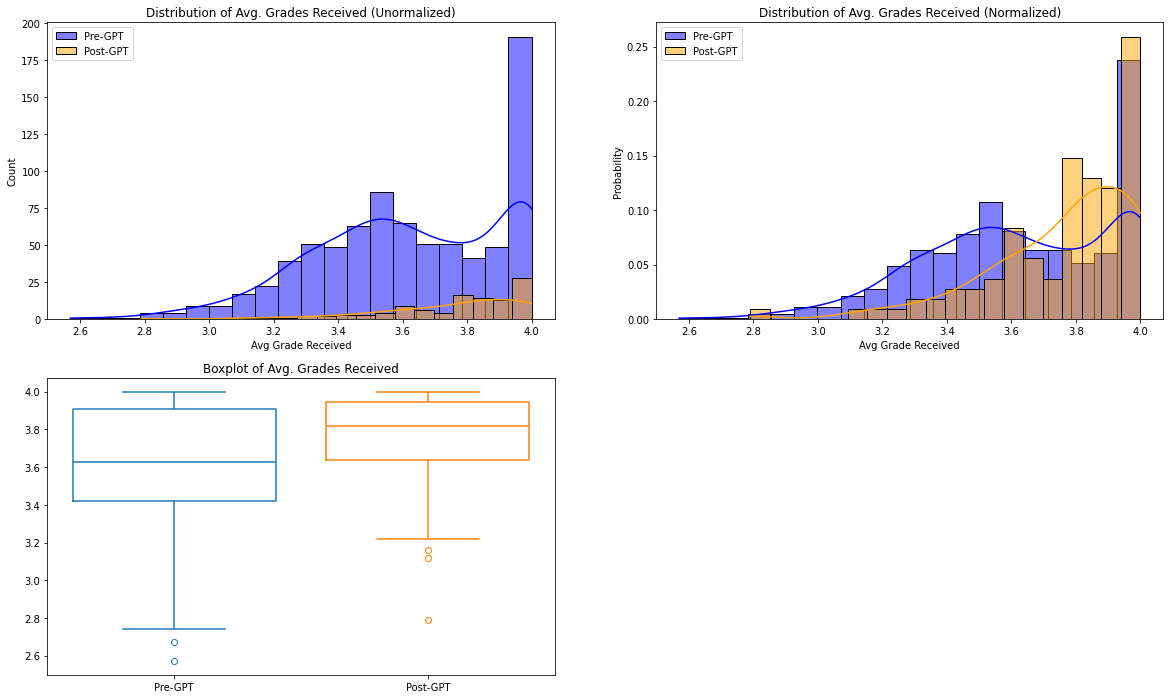

In [10]:
# visualization
plot_dist(pre_gpt, post_gpt)

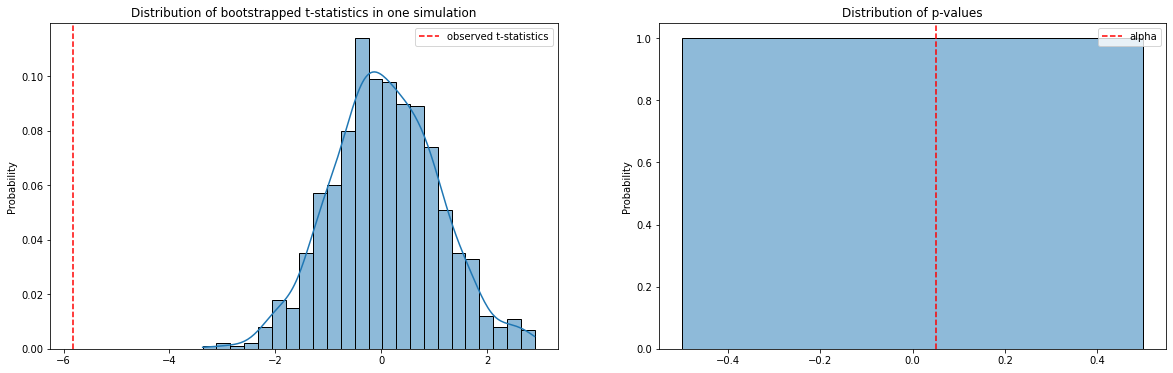

In [11]:
# bootstrapping t-test
observed_t, bootstrap_t, p_vals = bootstrap_ttest(pre_gpt['Avg Grade Received'], post_gpt['Avg Grade Received'])

plot_bootstrap_test(observed_t, bootstrap_t, p_vals)

## STEM Upper Division Courses


### STEM_upperDivision_nonAbstract_preGPT vs. STEM_upperDivision_nonAbstract_postGPT

In [3]:
# filter out data
params = {
    'is_ud': True,
    'is_stem': True,
    'is_abstract': False, 
    'is_written': False # no effect
}

pre_gpt, post_gpt = filter_data(df, **params)

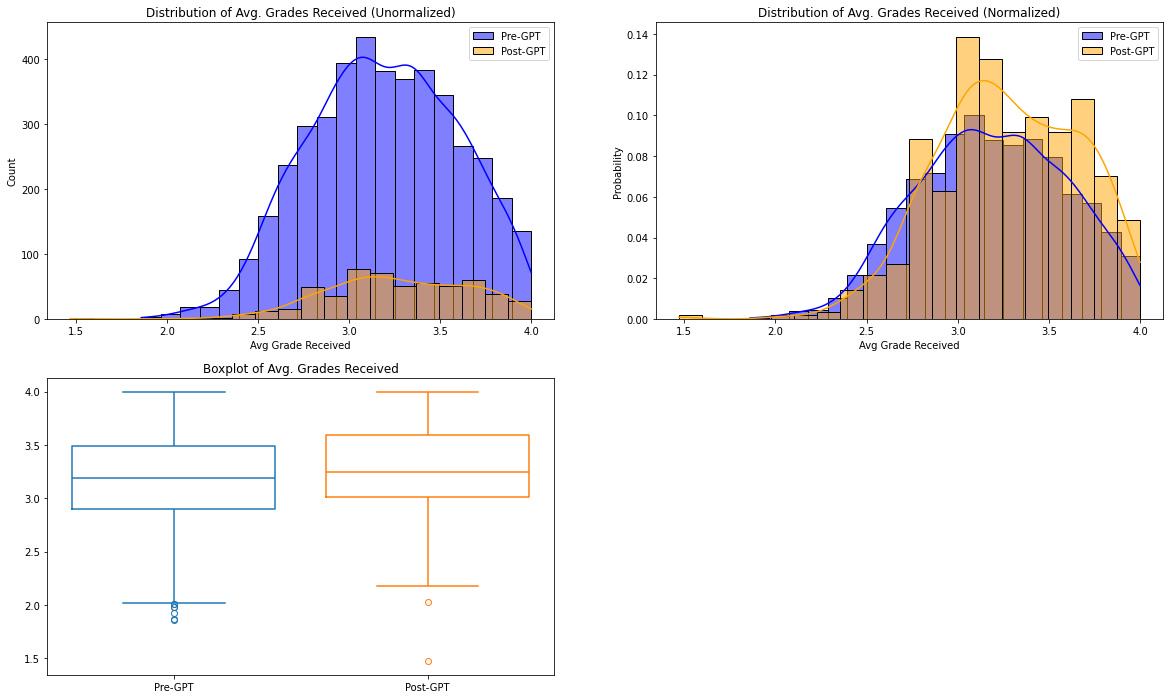

In [4]:
# visualization
plot_dist(pre_gpt, post_gpt)

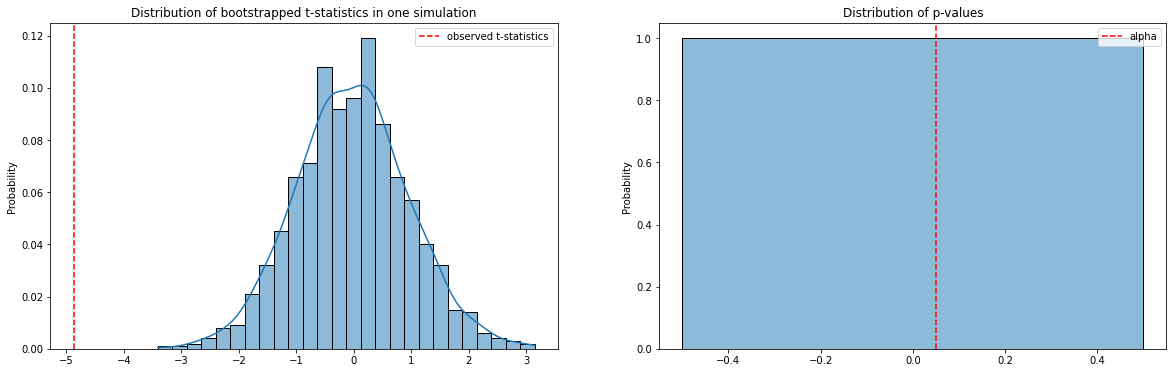

In [5]:
# bootstrapping t-test
observed_t, bootstrap_t, p_vals = bootstrap_ttest(pre_gpt['Avg Grade Received'], post_gpt['Avg Grade Received'])

plot_bootstrap_test(observed_t, bootstrap_t, p_vals)

### STEM_upperDivision_abstract_preGPT vs. STEM_upperDivision_abstract_postGPT

In [6]:
# filter out data
params = {
    'is_ud': True,
    'is_stem': True,
    'is_abstract': True, 
    'is_written': False # no effect
}

pre_gpt, post_gpt = filter_data(df, **params)

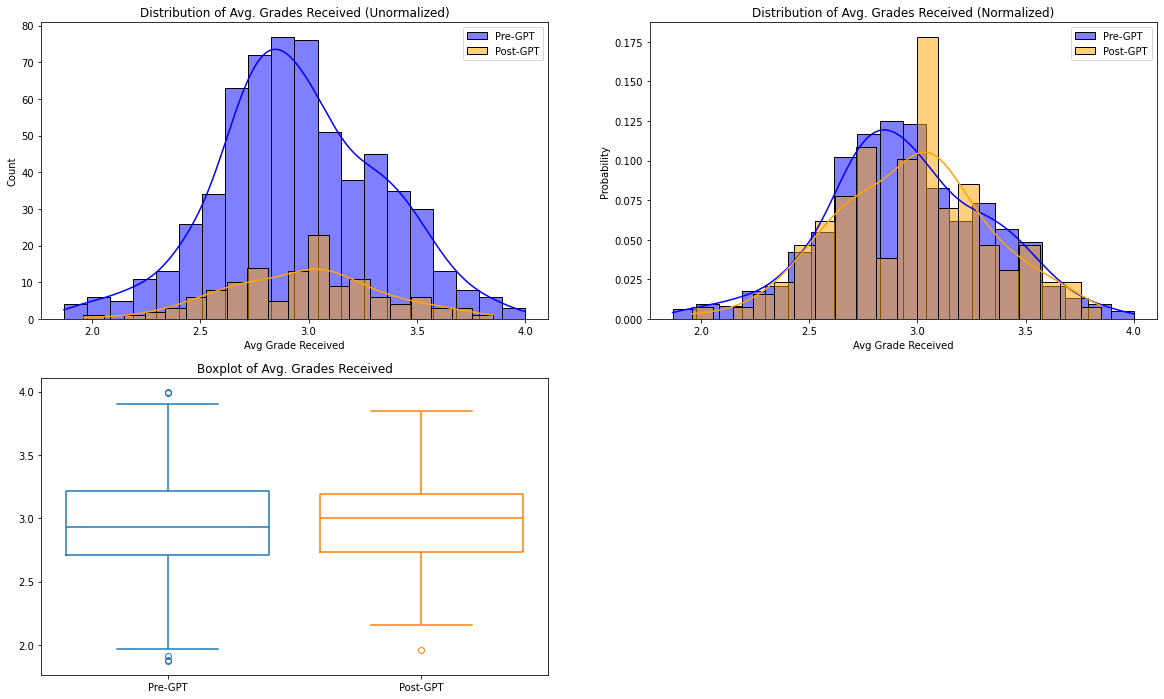

In [7]:
# visualization
plot_dist(pre_gpt, post_gpt)

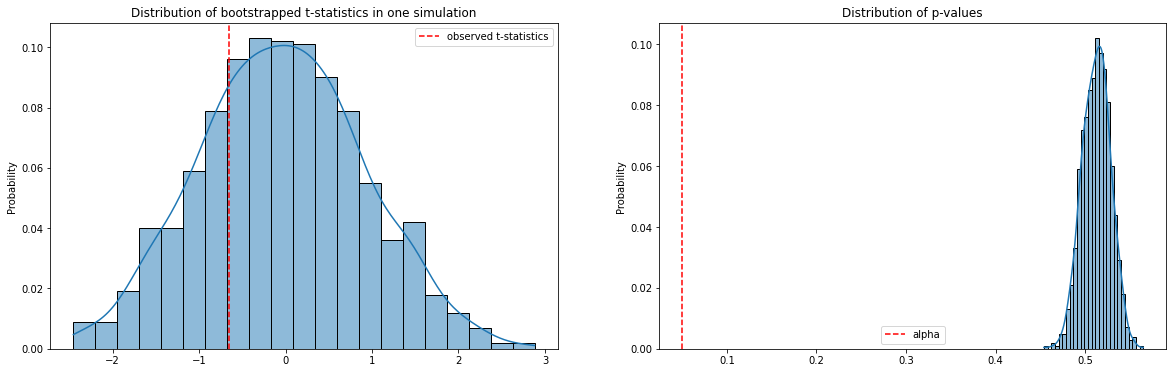

In [8]:
# bootstrapping t-test
observed_t, bootstrap_t, p_vals = bootstrap_ttest(pre_gpt['Avg Grade Received'], post_gpt['Avg Grade Received'])

plot_bootstrap_test(observed_t, bootstrap_t, p_vals)

## Arts Upper Division Courses

### Arts_upperDivision_writtenBased_preGPT vs. Arts_upperDivision_writtenBased_postGPT

In [9]:
params = {
    'is_ud': True,
    'is_stem': False,
    'is_abstract': False, # no effect 
    'is_written': True
}

pre_gpt, post_gpt = filter_data(df, **params)

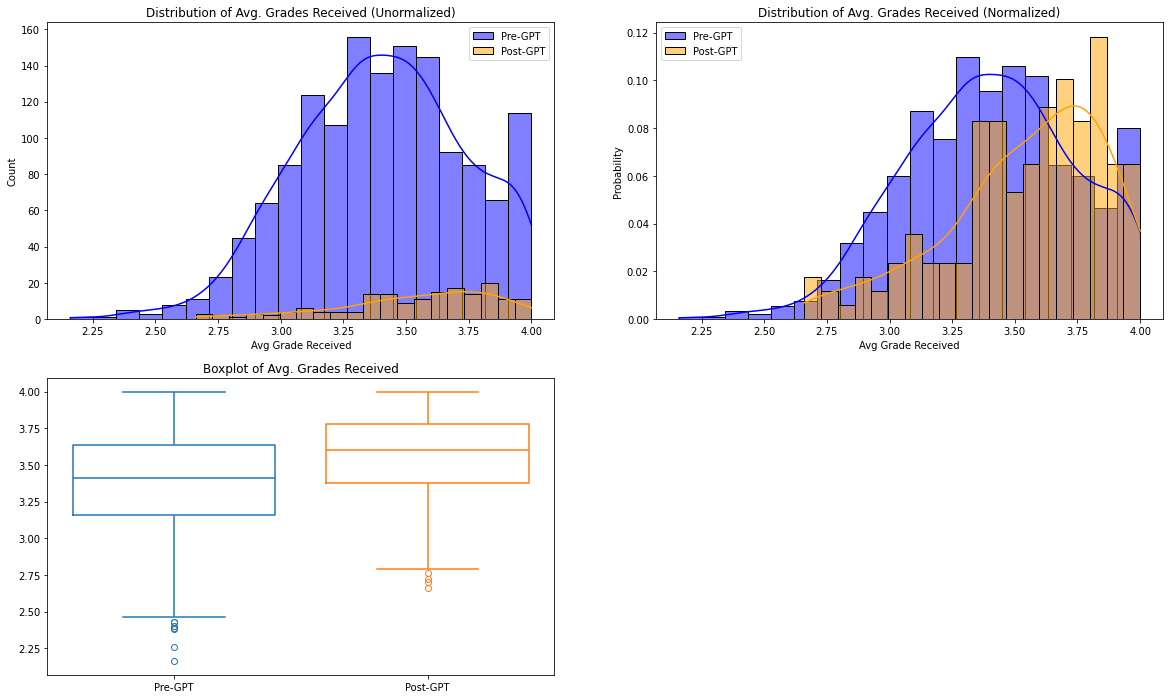

In [10]:
# visualization
plot_dist(pre_gpt, post_gpt)

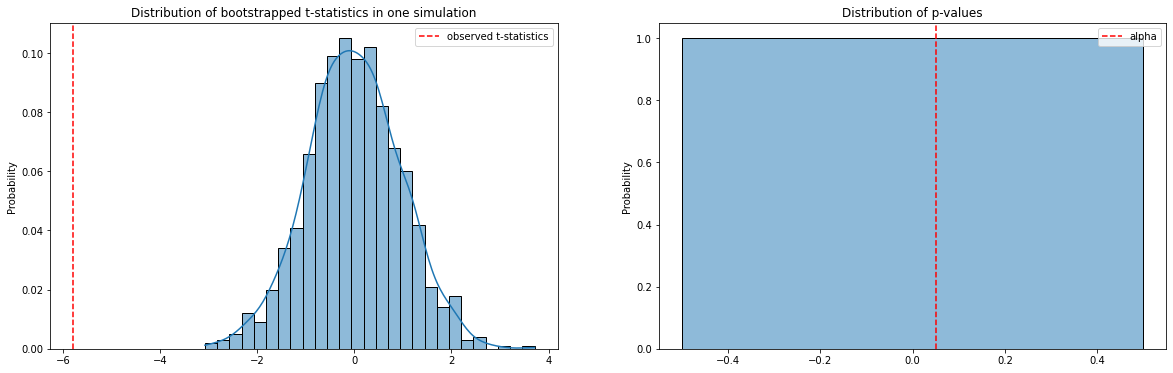

In [11]:
# bootstrapping t-test
observed_t, bootstrap_t, p_vals = bootstrap_ttest(pre_gpt['Avg Grade Received'], post_gpt['Avg Grade Received'])

plot_bootstrap_test(observed_t, bootstrap_t, p_vals)

### Arts_upperDivision_notWrittenBased_preGPT vs. Arts_upperDivision_notWrittenBased_postGPT

In [12]:
params = {
    'is_ud': True,
    'is_stem': False,
    'is_abstract': False, # no effect 
    'is_written': False
}

pre_gpt, post_gpt = filter_data(df, **params)

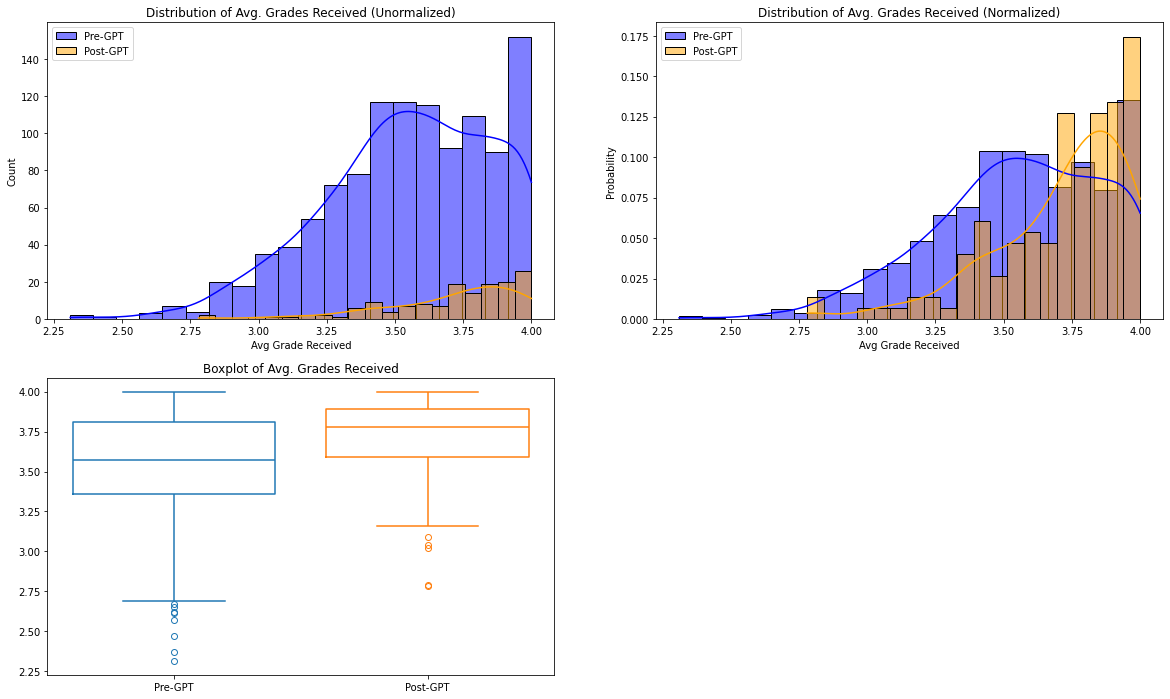

In [13]:
# visualization
plot_dist(pre_gpt, post_gpt)

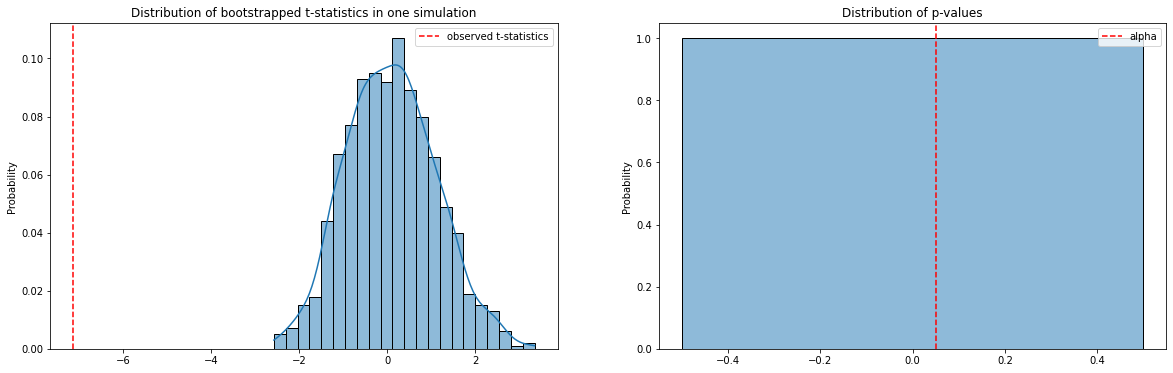

In [14]:
# bootstrapping t-test
observed_t, bootstrap_t, p_vals = bootstrap_ttest(pre_gpt['Avg Grade Received'], post_gpt['Avg Grade Received'])

plot_bootstrap_test(observed_t, bootstrap_t, p_vals)

## Potential cross comparisons
Not quite sure what to include at this time but there should be some.